# Information about Dataset

# FIFA 19 complete player dataset

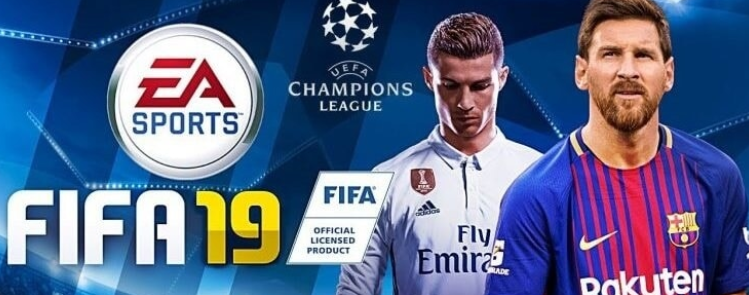

Detailed attributes for every player registered in the latest edition of FIFA 19 database.
Scraping code at GitHub repo: https://github.com/amanthedorkknight/fifa18-all-player-statistics/tree/master/2019

data.csv includes lastest edition FIFA 2019 players attributes like Age, Nationality, Overall, Potential, Club, Value, Wage, Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Position, Jersey Number, Joined, Loaned From, Contract Valid Until, Height, Weight, LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB, Crossing, Finishing, Heading, Accuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, and Release Clause.


In [53]:
import numpy as np
#NumPy is a python library used for working with arrays.
#It also has functions for working in domain of linear algebra, fourier transform, and matrices.
#We have lists that serve the purpose of arrays, but they are slow.NumPy aims to provide an array object that is up to 50x faster that traditional Python lists.

import pandas as pd 
#Why pandas: you want to explore a dataset stored in a CSV on your computer. Pandas will extract the data from that CSV into a DataFrame — 
#a table, basically — then let you do things like:
#Calculate statistics and answer questions about the data, like: What's the average, median, max, or min of each column?
#Does column A correlate with column B?
#What does the distribution of data in column C look like?
#Clean the data by doing things like removing missing values and filtering rows or columns by some criteria
#Visualize the data with help from Matplotlib. Plot bars, lines, histograms, bubbles, and more.
#Store the cleaned, transformed data back into a CSV, other file or database

import os
#The OS module in python provides functions for interacting with the operating system.
#This module provides a portable way of using operating system dependent functionality.
#The *os* and *os.path* modules include many functions to interact with the file system.

import matplotlib.pyplot as plt
#Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

import seaborn as sns

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
#UTF-8 is a variable-width character encoding standard 
#that uses between one and four eight-bit bytes to represent all valid Unicode code points.

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Any results you write to the current directory are saved as output.       

fifa19

/kaggle/input/fifa19/data.csv


In [54]:
data=pd.read_csv("/kaggle/input/fifa19/data.csv")
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [55]:
# tail shows last 5 rows
data.tail()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K
18206,18206,246269,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,England,https://cdn.sofifa.org/flags/14.png,46,66,Tranmere Rovers,...,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K


In [56]:
#A quantile defines a particular part of a data set, i.e. a quantile determines how many values in a distribution are above or 
#below a certain limit. Special quantiles are the quartile (quarter), the quintile (fifth) and percentiles (hundredth).
#count: number of entries
#mean: average of entries
#std: standart deviation
#min: minimum entry
##25%: first quantile
#50%: median or second quantile
#75%: third quantile
#max: maximum entry
data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [57]:
#Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually.
#1. Importing the required libraries for EDA(pandas,numpy,seaborn,matplotlib)
#2.Loading the data into the data frame (just read the CSV into a data frame and pandas data frame does the job for us.)
#3. Checking the types of data
data.dtypes
# We have to convert that string to the integer data only then we can plot the data via a graph
#5. Renaming the columns

Unnamed: 0          int64
ID                  int64
Name               object
Age                 int64
Photo              object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 89, dtype: object

In [58]:
#drop( self, labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors="raise" )
#labels: The labels to remove from the DataFrame. It’s used with ‘axis’ to identify rows or column names.
#axis: The possible values are {0 or ‘index’, 1 or ‘columns’}, default 0. It’s used with ‘labels’ to specify rows or columns.
#index: indexes to drop from the DataFrame.

data = data.drop(labels= ['ID', 'Unnamed: 0', 'Photo', 'Flag','GKHandling','GKKicking','SlidingTackle','GKPositioning','GKDiving','Special','Club Logo','StandingTackle','International Reputation'], axis=1)
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,Weak Foot,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,4.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,4.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,3.0,...,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,5.0,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,13.0,€196.4M


In [59]:
#6. Dropping the duplicate rows
duplicate_rows_data = data[data.duplicated()]
print('number of duplicate rows: ', duplicate_rows_data.shape)

number of duplicate rows:  (0, 76)


In [60]:
data = data.drop_duplicates()
data.count()

Name              18207
Age               18207
Nationality       18207
Overall           18207
Potential         18207
                  ...  
Penalties         18159
Composure         18159
Marking           18159
GKReflexes        18159
Release Clause    16643
Length: 76, dtype: int64

In [61]:
#7. Dropping the missing or null values.
# Dropping the missing values.
data = data.dropna() 
data.count()

Name              0
Age               0
Nationality       0
Overall           0
Potential         0
                 ..
Penalties         0
Composure         0
Marking           0
GKReflexes        0
Release Clause    0
Length: 76, dtype: int64

# What’s Tidy Data?
# How to organize messy datasets in Python with Melt and Pivotable functions

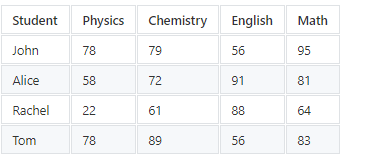

Tidy Data is a way of structuring datasets to facilitate analysis.
In tidy data:
1. Each variable must have its own column.
2. Each observation must have its own row.
3. Each type of observational unit forms a table.

Messy data is any other arrangement of the data.
There are 5 examples of messy data:
* Column headers are values, not variable names.
* Multiple variables are stored in one column.
* Variables are stored in both rows and columns.
* Multiple types of observational units are stored in the same table.
* A single observational unit is stored in multiple tables.

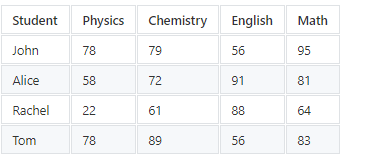

It might look like a nice dataset intuitively but it does not follow the rules of tidy data. Referencing the first rule where each variable forms a column, we have 3 variables — Student , Subject and Score. We broke this rule because each subject takes one column other than the first one. We have 4 observations per row, instead of 1 observation per row, breaking the second rule as well. However, we followed the last rule since we only have Score as an observational unit and it is in 1 table.
Using a simple melt transformation with pandas, we can convert this untidy data to something that follows our tidy data convention.


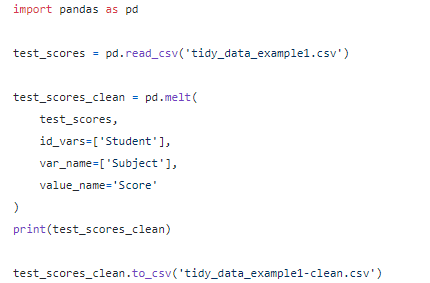

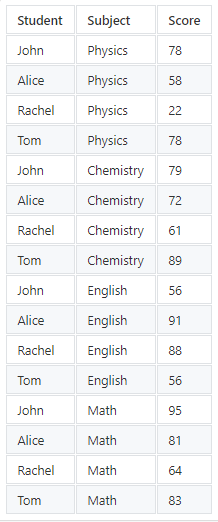

**My data is tidy, what’s next?**
We can use tidy data to explore our dataset. A simple bar chart should do the trick.
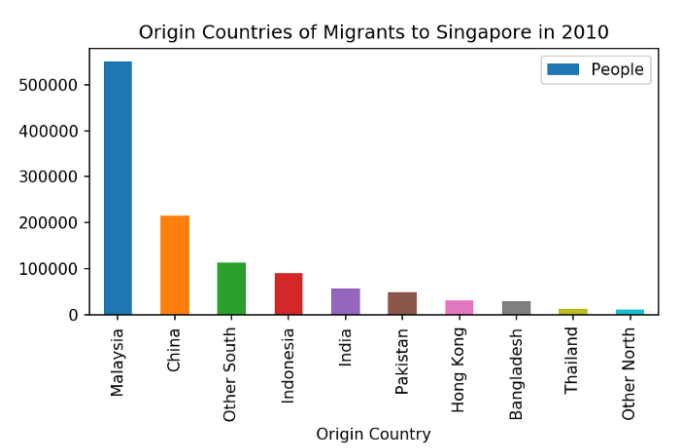
Without much data wrangling, you are able to get a nice. A CrowdFlower survey claims that 60% of time is spent on data cleaning. That’s why being familiar with data cleaning tools are important.